In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline


In [37]:
mnist = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()


Test_Set :  (10000, 28, 28) (10000,) 
Shape of Unique Classes :  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))
Exemple des images de chiens et chats : 


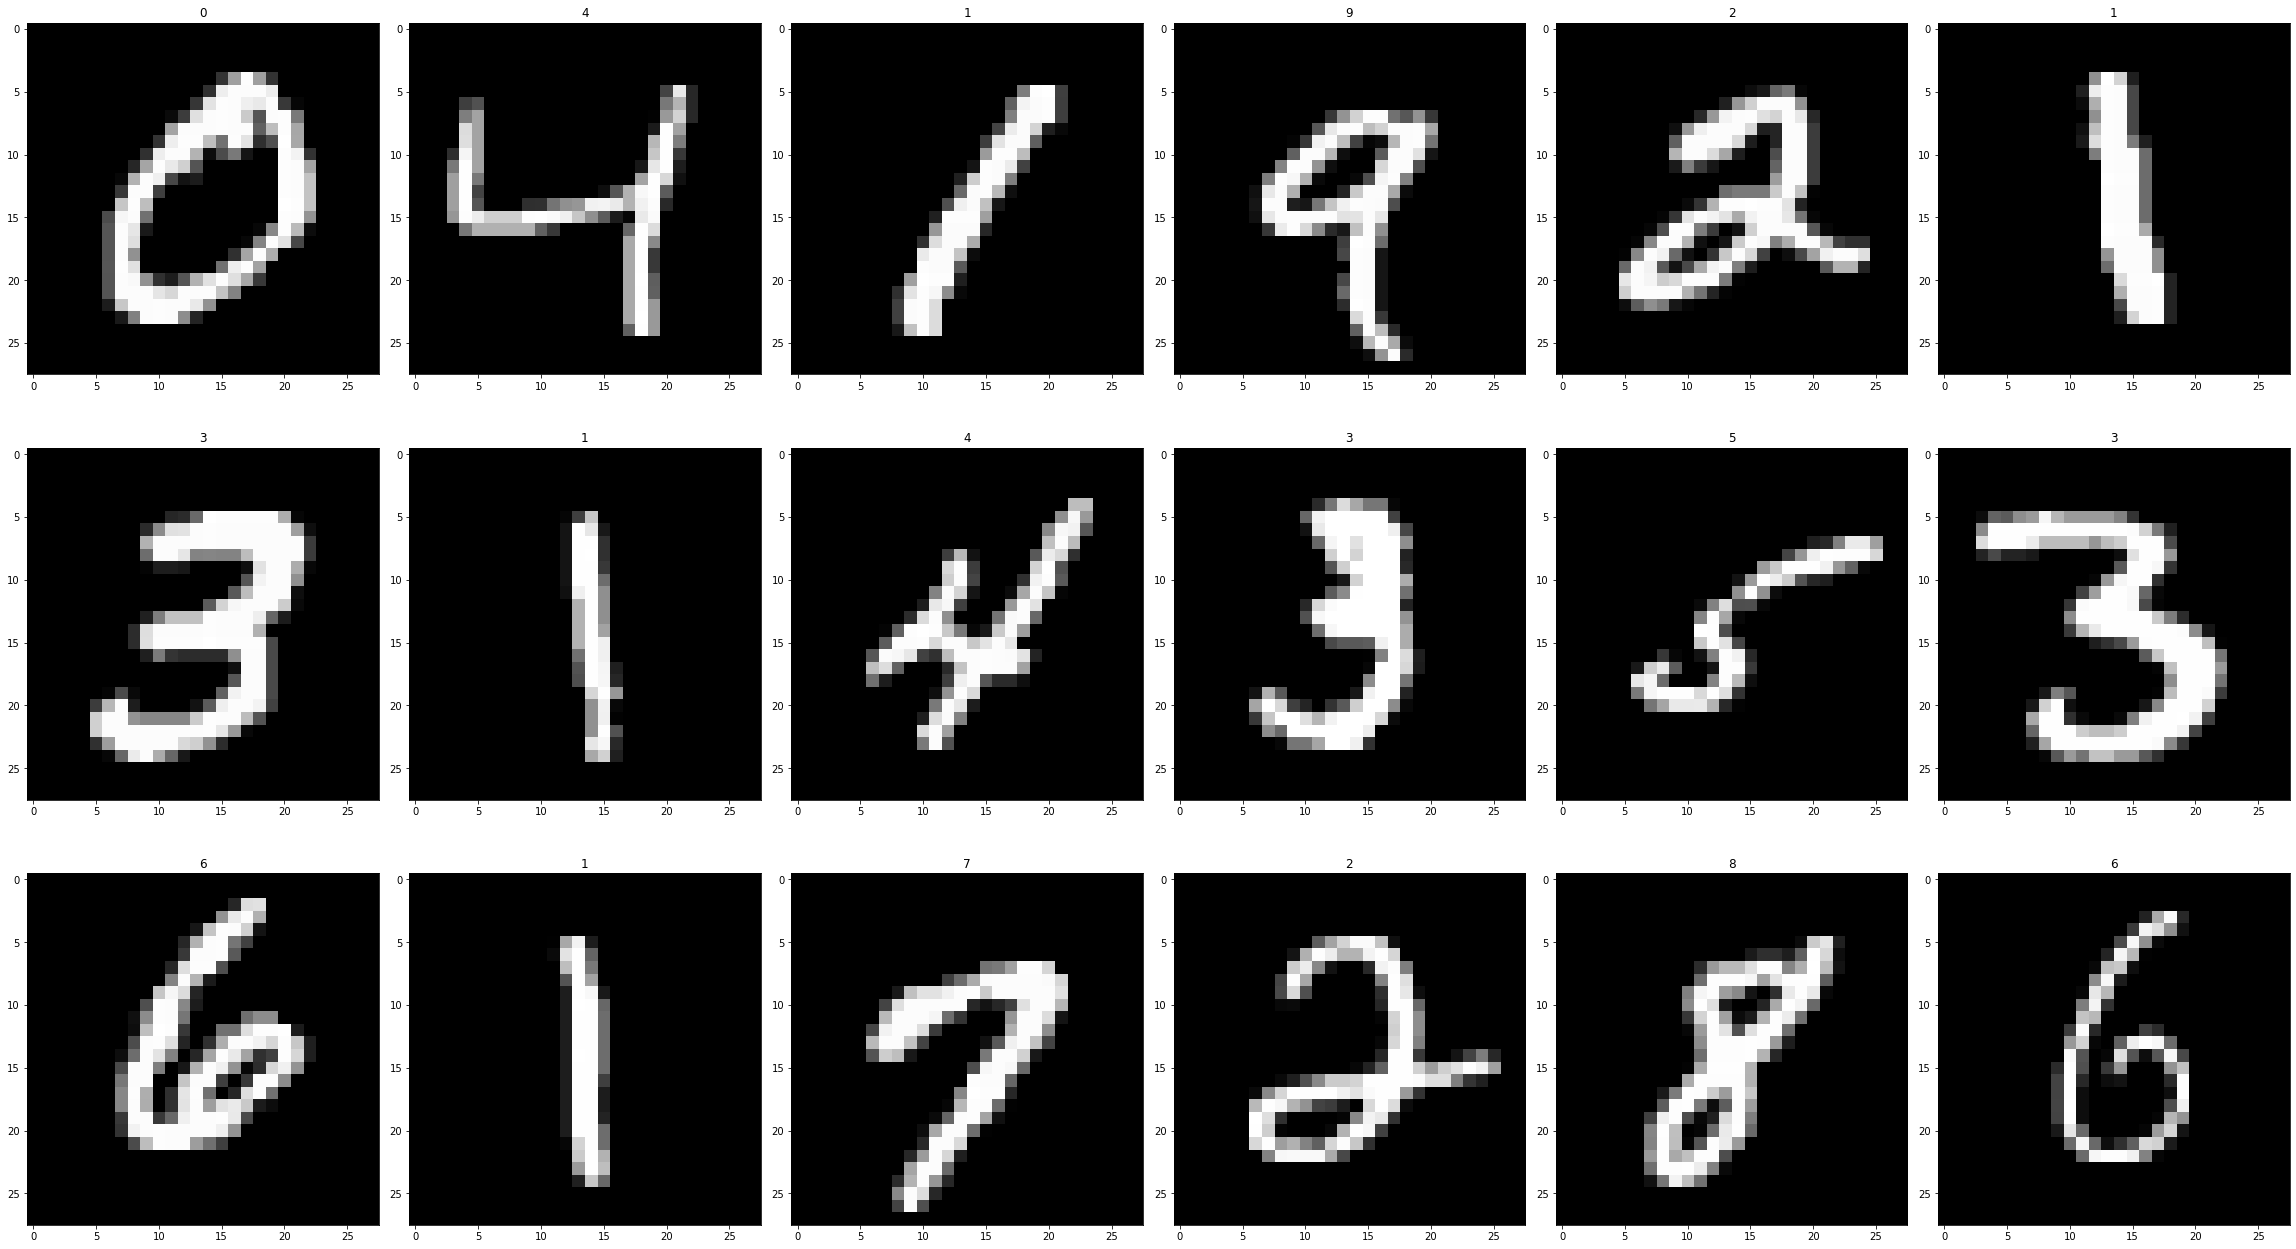

In [38]:
print("Test_Set : ",X_test.shape , y_test.shape ,"\nShape of Unique Classes : ", np.unique(y_test,return_counts=True))
print('Exemple des images de chiens et chats : ')
plt.figure(figsize=(32,24))

for i in range(1,19):
    plt.subplot(4,6,i)
    plt.imshow(X_train[i].reshape(28,28),cmap='gray')
    plt.title(y_train[i] )
    plt.tight_layout()
plt.show()

In [16]:
sorted(set(y_train))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [21]:
# X_train = X_train.reshape(X_train.shape[0],-1)
# X_train_norm = X_train/X_train.max()
# X_test_norm = X_test/X_test.max()

In [36]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [39]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [40]:
input_shape = (28, 28, 1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [41]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 46s 108ms/step - loss: 1.1216 - accuracy: 0.8476 - val_loss: 0.0877 - val_accuracy: 0.9742
Epoch 2/15
422/422 [==============================] - 43s 102ms/step - loss: 0.1801 - accuracy: 0.9448 - val_loss: 0.0543 - val_accuracy: 0.9852
Epoch 3/15
422/422 [==============================] - 43s 103ms/step - loss: 0.1327 - accuracy: 0.9588 - val_loss: 0.0469 - val_accuracy: 0.9867
Epoch 4/15
422/422 [==============================] - 44s 104ms/step - loss: 0.1087 - accuracy: 0.9662 - val_loss: 0.0509 - val_accuracy: 0.9862
Epoch 5/15
422/422 [==============================] - 43s 102ms/step - loss: 0.0976 - accuracy: 0.9701 - val_loss: 0.0448 - val_accuracy: 0.9875
Epoch 6/15
422/422 [==============================] - 43s 102ms/step - loss: 0.0862 - accuracy: 0.9728 - val_loss: 0.0420 - val_accuracy: 0.9893
Epoch 7/15
422/422 [==============================] - 43s 102ms/step - loss: 0.0789 - accuracy: 0.9758 - val_loss: 0.0401 - val_ac

In [53]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.03424087166786194
Test accuracy: 0.989300012588501
